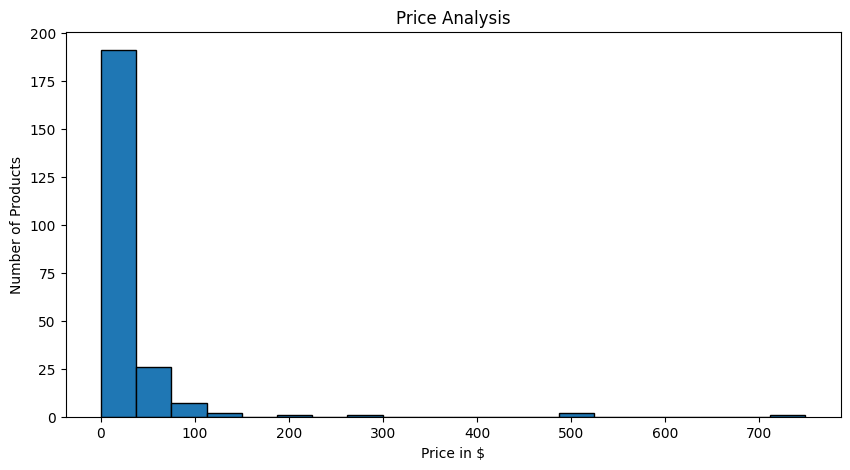

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/samenergy/Documents/Projects/peer-group-5-webscraping/ebay_cars.csv")

# Function to clean price values
def clean_price(price):
    price = str(price).replace("$", "").replace(",", "").strip()  # Ensure string format and remove commas
    if "to" in price:
        try:
            low, high = map(float, price.split("to"))
            return (low + high) / 2
        except ValueError:
            return None
    else:
        try:
            return float(price)
        except ValueError:
            return None

# Apply cleaning function
df["price"] = df["price"].astype(str).apply(clean_price)

# Drop NaN values in the 'price' column
df = df.dropna(subset=["price"]).reset_index(drop=True)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df["price"], bins=20, edgecolor="black")  
plt.xlabel("Price in $")
plt.ylabel("Number of Products")
plt.title("Price Analysis")
plt.show()
